# Using interfaces.input_parameters to setup and organize the synchrotron and rf parameters

In [1]:
# Adding folder on TOP of blond_common to PYTHONPATH
import sys
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
sys.path.append('./../../../')

## 2. Defining the RFStation object, where the rf parameters at a given station are defined

## 2.0 Define a Ring first

In [2]:
# Defining a ramp with a program time vs. energy (warning: initial energy cannot be 0)

from blond_common.interfaces.beam.beam import Proton
from blond_common.interfaces.input_parameters.ring import Ring, RingOptions

ring_length = 6911.5  # m
gamma_transition = 17.95
alpha_0 = 1/gamma_transition**2.

time_start_ramp = 1e-3  # s 
time_end_ramp = 29e-3  # s
time_array = np.array([0, time_start_ramp, time_end_ramp, time_end_ramp+1e-3])  # s

energy_init = 26e9  # eV
energy_fin = 27e9  # eV
delta_E = 1e6  # eV
total_energy = np.array([energy_init, energy_init, energy_fin, energy_fin])  # eV

particle = Proton()

ring_options = RingOptions(
    interpolation='linear', flat_bottom=0,
    flat_top=0, t_start=None, t_end=None)

ring = Ring(ring_length, alpha_0, (time_array, total_energy),
            particle, synchronous_data_type='total energy',
            RingOptions=ring_options)

./../../..\blond_common\interfaces\input_parameters\ring.py:228: UserWarning: WARNING in Ring: The number of turns for the simulation was changed by passing a momentum program.
  "simulation was changed by passing a momentum " +


<IPython.core.display.Javascript object>


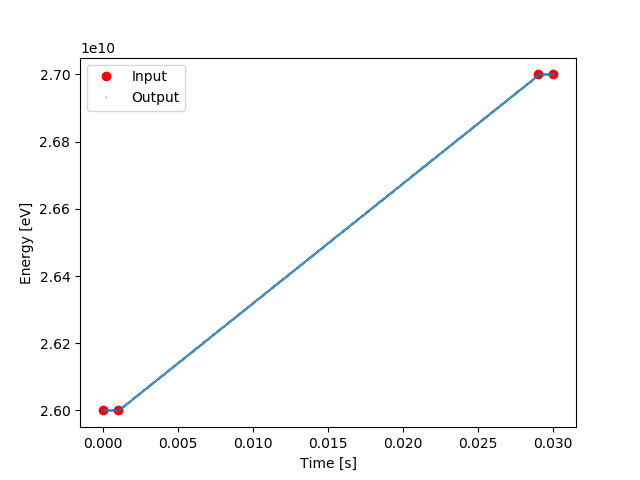

In [3]:
# Note that size of programs is (n_sections, n_turns+1)
plt.figure('Ring Programs')
plt.clf()
plt.plot(time_array, total_energy, 'ro', label='Input')
plt.plot(ring.cycle_time, ring.energy[0,:], '.', label='Output', markersize=0.5)
plt.xlabel('Time [s]')
plt.ylabel('Energy [eV]')
plt.legend(loc='best')

## 2.1 Defining an RF station with a single RF system

In [4]:
# Constant RF voltage, harmonic, phase program

from blond_common.interfaces.input_parameters.rf_parameters import RFStation

harmonic = 4620
voltage = 6e6  # V
phi_rf = 0  # rad

rf_station = RFStation(ring, harmonic, voltage, phi_rf)


<IPython.core.display.Javascript object>


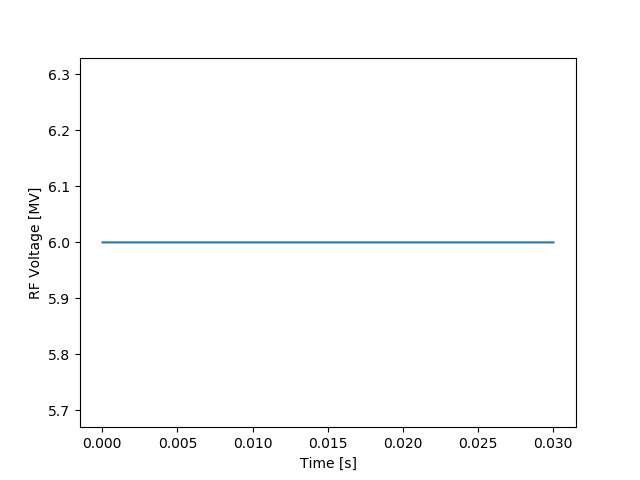

Text(0, 0.5, 'RF Voltage [MV]')

In [5]:
# Note that size of programs is (n_rf_systems, n_turns+1)
plt.figure('Programs-1')
plt.clf()
plt.plot(ring.cycle_time, rf_station.voltage[0,:]/1e6)
plt.xlabel('Time [s]')
plt.ylabel('RF Voltage [MV]')

In [6]:
# Using an RF program, the same can be done for the harmonic and phi_rf
# The rf program should be an array/list of size n_turns+1
# NB: the phase is not automatically adjusting if a non-integer harmonic is set

from blond_common.interfaces.input_parameters.rf_parameters import RFStation

harmonic = 4620
voltage = np.linspace(5e6, 6e6, ring.n_turns+1)  # V
phi_rf = 0  # rad

rf_station = RFStation(ring, harmonic, voltage, phi_rf)


<IPython.core.display.Javascript object>


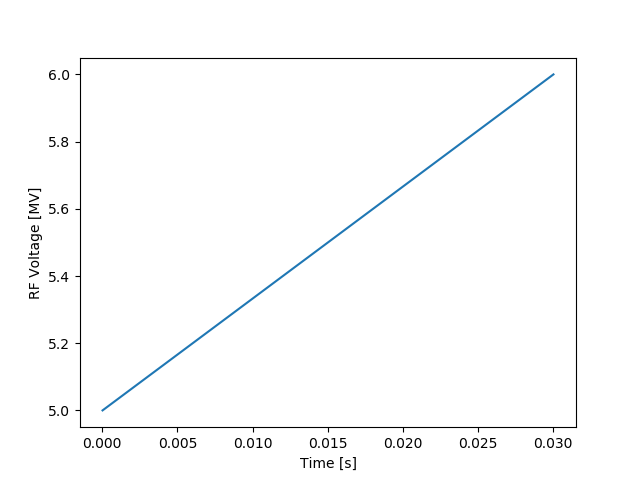

Text(0, 0.5, 'RF Voltage [MV]')

In [7]:
# Note that size of programs is (n_rf_systems, n_turns+1)
plt.figure('Programs-2')
plt.clf()
plt.plot(ring.cycle_time, rf_station.voltage[0,:]/1e6)
plt.xlabel('Time [s]')
plt.ylabel('RF Voltage [MV]')

In [8]:
# Using an RF program defined with time, the same can be done for the harmonic and phi_rf
# NB: the phase is not automatically adjusting if a non-integer harmonic is set

from blond_common.interfaces.input_parameters.rf_parameters import RFStation

harmonic = 4620
voltage_time = (0, 1e-2, 2e-2)  # s
voltage = (5e6, 5e6, 6e6)  # V
phi_rf = 0  # rad

rf_station = RFStation(ring, harmonic, (voltage_time, voltage), phi_rf)

<IPython.core.display.Javascript object>


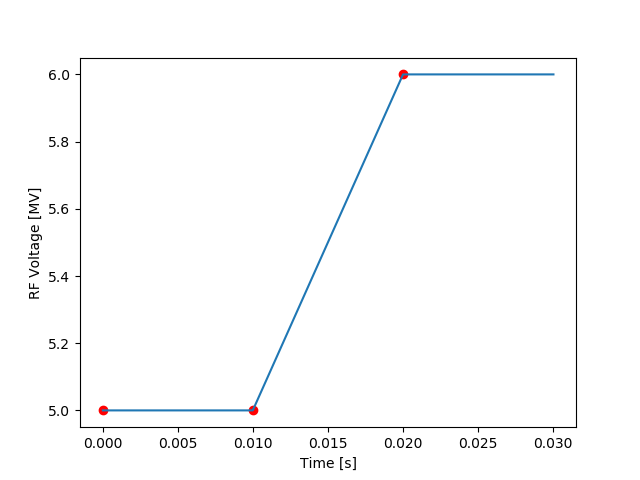

Text(0, 0.5, 'RF Voltage [MV]')

In [9]:
# Note that size of programs is (n_rf_systems, n_turns+1)
plt.figure('Programs-3')
plt.clf()
plt.plot(voltage_time, np.array(voltage)/1e6, 'ro', label='Input')
plt.plot(ring.cycle_time, rf_station.voltage[0,:]/1e6)
plt.xlabel('Time [s]')
plt.ylabel('RF Voltage [MV]')

In [10]:
# With a program, and a Ring with custom options

ring_options_custom = RingOptions(t_start=7.5e-3,
                           t_end=15e-3)

ring_custom = Ring(ring_length, alpha_0, (time_array, total_energy),
            particle, synchronous_data_type='total energy',
            RingOptions=ring_options_custom)

<IPython.core.display.Javascript object>


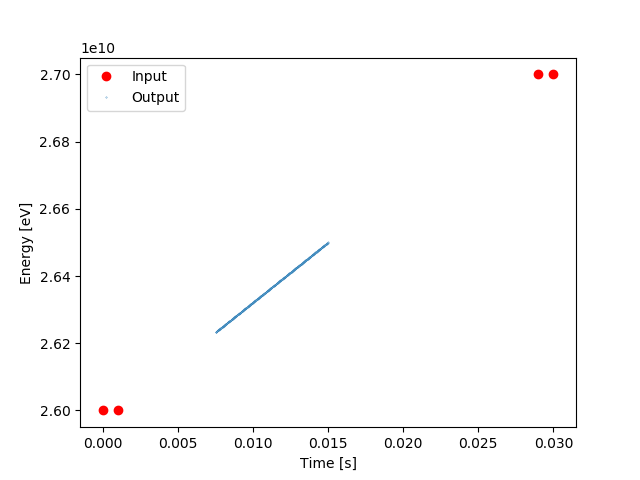

In [11]:
plt.figure('Ring custom')
plt.clf()
plt.plot(time_array, total_energy, 'ro', label='Input')
plt.plot(ring_custom.cycle_time+7.5e-3, ring_custom.energy[0,:], '.', label='Output', markersize=0.5)
plt.xlabel('Time [s]')
plt.ylabel('Energy [eV]')
plt.legend(loc='best')

In [12]:
# Using an RF program defined with time, the same can be done for the harmonic and phi_rf
# The RF program will be taken with the same t_start and t_end as the ring object
# NB: the phase is not automatically adjusting if a non-integer harmonic is set

from blond_common.interfaces.input_parameters.rf_parameters import RFStation

harmonic = 4620
voltage_time = (0, 1e-2, 2e-2)  # s
voltage = (5e6, 5e6, 6e6)  # V
phi_rf = 0  # rad

rf_station = RFStation(ring_custom, harmonic, (voltage_time, voltage), phi_rf)

<IPython.core.display.Javascript object>


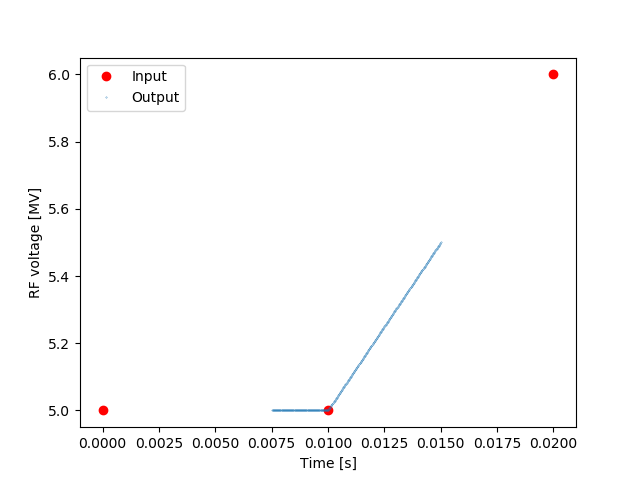

In [13]:
plt.figure('Programs-4')
plt.clf()
plt.plot(voltage_time, np.array(voltage)/1e6, 'ro', label='Input')
plt.plot(ring_custom.cycle_time+7.5e-3, rf_station.voltage[0,:]/1e6, '.', label='Output', markersize=0.5)
plt.xlabel('Time [s]')
plt.ylabel('RF voltage [MV]')
plt.legend(loc='best')

In [14]:
# With a program, and a Ring with custom options

ring_options_custom = RingOptions(interp_time=1e-3)

ring_custom = Ring(ring_length, alpha_0, (time_array, total_energy),
            particle, synchronous_data_type='total energy',
            RingOptions=ring_options_custom)

<IPython.core.display.Javascript object>


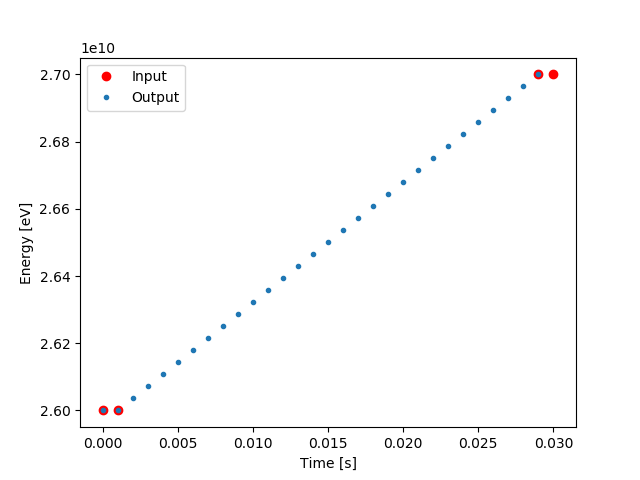

In [15]:
plt.figure('Ring custom-2')
plt.clf()
plt.plot(time_array, total_energy, 'ro', label='Input')
plt.plot(ring_custom.cycle_time, ring_custom.energy[0,:], '.', label='Output')
plt.xlabel('Time [s]')
plt.ylabel('Energy [eV]')
plt.legend(loc='best')

In [16]:
# Using an RF program defined with time, the same can be done for the harmonic and phi_rf
# The RF program will use the same time array as the Ring object
# NB: the phase is not automatically adjusting if a non-integer harmonic is set
# NB2: the phi_s calculation does not work since delta_E does not correspond to 1-turn increment

from blond_common.interfaces.input_parameters.rf_parameters import RFStation

harmonic = 4620
voltage_time = (0, 1e-2, 2e-2)  # s
voltage = (5e6, 5e6, 6e6)  # V
phi_rf = 0  # rad

rf_station = RFStation(ring_custom, harmonic, (voltage_time, voltage), phi_rf)

./../../..\blond_common\interfaces\input_parameters\rf_parameters.py:444: RuntimeWarning: invalid value encountered in arcsin
  phi_s = np.arcsin(acceleration_ratio)
./../../..\blond_common\interfaces\input_parameters\rf_parameters.py:453: RuntimeWarning: invalid value encountered in remainder
  phi_s[index] = (np.pi - phi_s[index]) % (2*np.pi)


<IPython.core.display.Javascript object>


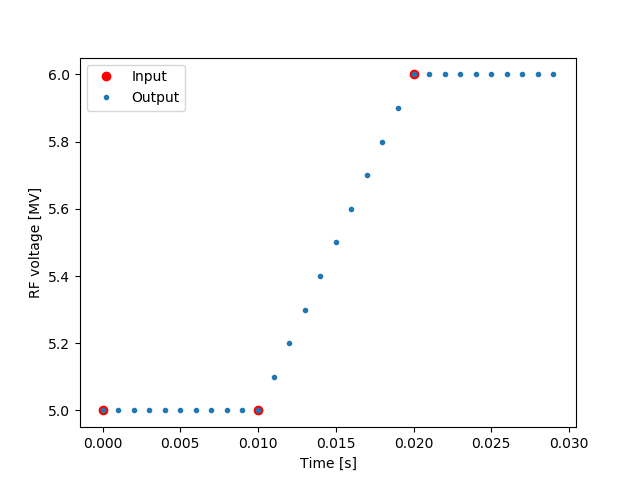

In [17]:
plt.figure('Programs-5')
plt.clf()
plt.plot(voltage_time, np.array(voltage)/1e6, 'ro', label='Input')
plt.plot(ring_custom.cycle_time, rf_station.voltage[0,:]/1e6, '.', label='Output')
plt.xlabel('Time [s]')
plt.ylabel('RF voltage [MV]')
plt.legend(loc='best')

## 2.2 Defining several RF systems at one RF station

In [18]:
# Constant RF voltage, harmonic, phase program
# NB: don't forget to pass n_rf !

from blond_common.interfaces.input_parameters.rf_parameters import RFStation

harmonic = [4620, 4620*4]
voltage = [6e6, 6e5]  # V
# phi_rf = 0  # rad, In that case, RF systems are in phase with phi_rf = 0 for both
phi_rf = [0, np.pi]  # rad, in that case the two RF systems have different phases
n_rf = 2

rf_station = RFStation(ring, harmonic, voltage, phi_rf, n_rf=n_rf)

<IPython.core.display.Javascript object>


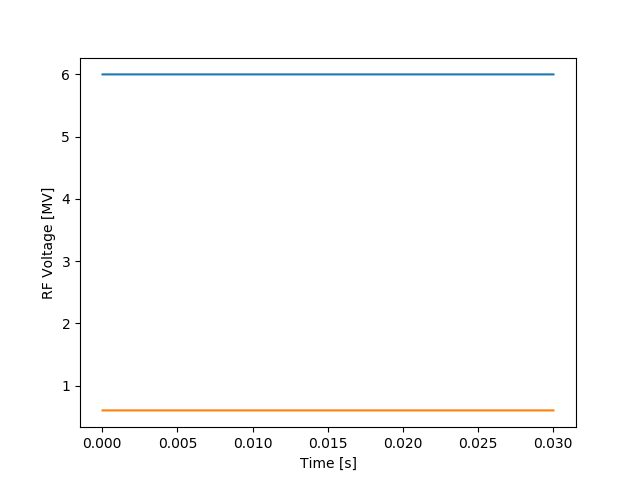

Text(0, 0.5, 'RF Voltage [MV]')

In [19]:
# Note that size of programs is (n_rf_systems, n_turns+1)
plt.figure('Programs-6')
plt.clf()
plt.plot(ring.cycle_time, rf_station.voltage[0,:]/1e6)
plt.plot(ring.cycle_time, rf_station.voltage[1,:]/1e6)
plt.xlabel('Time [s]')
plt.ylabel('RF Voltage [MV]')

<IPython.core.display.Javascript object>


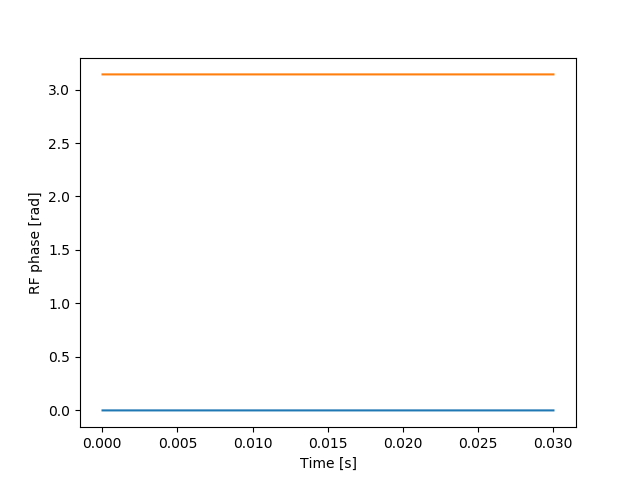

Text(0, 0.5, 'RF phase [rad]')

In [20]:
# Note that size of programs is (n_rf_systems, n_turns+1)
plt.figure('Programs-6 phase')
plt.clf()
plt.plot(ring.cycle_time, rf_station.phi_rf[0,:])
plt.plot(ring.cycle_time, rf_station.phi_rf[1,:])
plt.xlabel('Time [s]')
plt.ylabel('RF phase [rad]')

In [21]:
# With a time program for the main rf, using 2 RF systems
# NB: don't forget to pass n_rf !
# NB2: if a program is defined for the first harmonic,
# you need to define a program for the second harmonic using tuples

from blond_common.interfaces.input_parameters.rf_parameters import RFStation

harmonic = [4620, 4620*4]
voltage_time_main = (0, 1e-2, 2e-2)  # s
voltage_main = (5e6, 6.5e6, 7e6)  # V
voltage_time_second = (0,)  # s
voltage_second = (5e5,)  # V
# phi_rf = 0  # rad, In that case, RF systems are in phase with phi_rf = 0 for both
phi_rf = [0, np.pi]  # rad, in that case the two RF systems have different phases
n_rf = 2

rf_station = RFStation(ring, harmonic,
                       ((voltage_time_main, voltage_main),
                        (voltage_time_second, voltage_second)),
                       phi_rf, n_rf=n_rf)

<IPython.core.display.Javascript object>


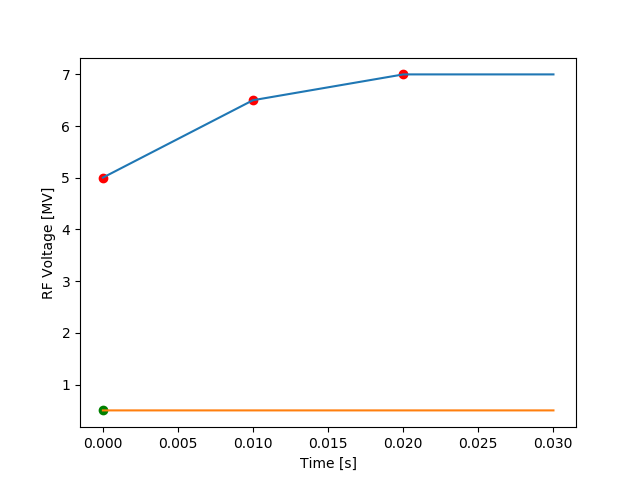

Text(0, 0.5, 'RF Voltage [MV]')

In [22]:
# Note that size of programs is (n_rf_systems, n_turns+1)
plt.figure('Programs-7')
plt.clf()
plt.plot(voltage_time_main, np.array(voltage_main)/1e6, 'ro', label='Input')
plt.plot(ring.cycle_time, rf_station.voltage[0,:]/1e6)
plt.plot(voltage_time_second, np.array(voltage_second)/1e6, 'go', label='Input')
plt.plot(ring.cycle_time, rf_station.voltage[1,:]/1e6)
plt.xlabel('Time [s]')
plt.ylabel('RF Voltage [MV]')

## 2.3 Definining several RF stations in one ring

In [23]:
# Creating a ring object with two sections of same length
# with an acceleration ramp

from blond_common.interfaces.input_parameters.ring import Ring
from blond_common.interfaces.beam.beam import Proton

ring_length = 6911.5  # m
length_section_1 = ring_length/2  # m
length_section_2 = ring_length/2  # m

gamma_transition = 17.95
alpha_0 = 1/gamma_transition**2.

energy_init = 26e9  # eV
energy_fin = 26.01e9  # eV
delta_E = 1e6  # eV
total_energy_1 = np.arange(energy_init, energy_fin, delta_E)  # eV
total_energy_2 = np.arange(energy_init, energy_fin, delta_E) + delta_E/2 # eV

n_turns = len(total_energy_1)-1
particle = Proton()
ring = Ring([length_section_1, length_section_2], alpha_0,
            [total_energy_1, total_energy_2],
            particle, n_turns=n_turns, n_sections=2,
            synchronous_data_type='total energy')

In [24]:
# The rf stations are defined as before with the important addition of the
# section_index parameter to specify after which ring section the rf station is placed
# NB: the phase of the rf does not take into account the phase advance from
# one section to another and does not take into account the 

harmonic = 4620
voltage = 6e6
phi_rf = 0  # rad

rf_station_1 = RFStation(ring, harmonic, voltage, phi_rf, section_index=1)

harmonic = 4620*4
voltage = 6e5
phi_rf = np.pi  # rad

rf_station_2 = RFStation(ring, harmonic, voltage, phi_rf, section_index=2)


<IPython.core.display.Javascript object>


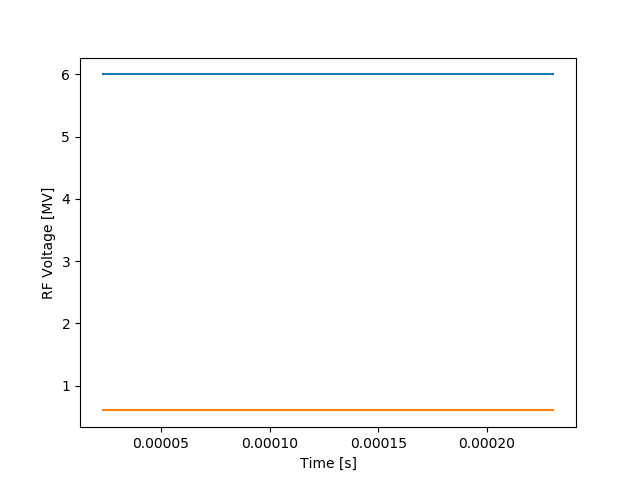

Text(0, 0.5, 'RF Voltage [MV]')

In [25]:
# Note that size of programs is (n_rf_systems, n_turns+1) for each station
plt.figure('Programs-8')
plt.clf()
plt.plot(ring.cycle_time, rf_station_1.voltage[0,:]/1e6)
plt.plot(ring.cycle_time, rf_station_2.voltage[0,:]/1e6)
plt.xlabel('Time [s]')
plt.ylabel('RF Voltage [MV]')